<a href="https://colab.research.google.com/github/JeswinMS4/Automated_Summarization_Language_Translation/blob/main/Bernstein_vazirani_algorithm_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit ipywidgets
!pip install pylatexenc
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 8.3 MB/s eta 0:00:00


In [4]:
from qiskit import *
%matplotlib inline
#from qiskit.tools.visualization import plot_histogram

In [5]:
from qiskit_aer import Aer

In [21]:
secretnumber = '101100'

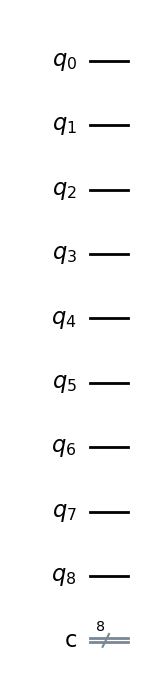

In [25]:
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))
circuit.draw('mpl')

In [26]:
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

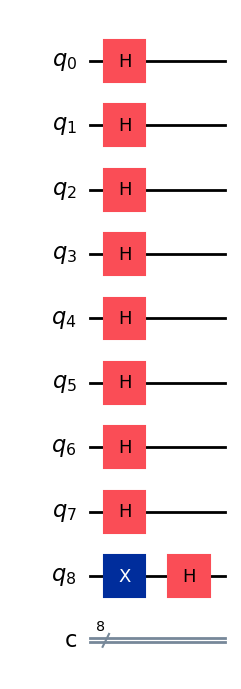

In [27]:
circuit.draw('mpl')

In [28]:
circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=9, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(9, 'q'), 0), Qubit(QuantumRegister(9, 'q'), 1), Qubit(QuantumRegister(9, 'q'), 2), Qubit(QuantumRegister(9, 'q'), 3), Qubit(QuantumRegister(9, 'q'), 4), Qubit(QuantumRegister(9, 'q'), 5), Qubit(QuantumRegister(9, 'q'), 6), Qubit(QuantumRegister(9, 'q'), 7), Qubit(QuantumRegister(9, 'q'), 8)), clbits=())

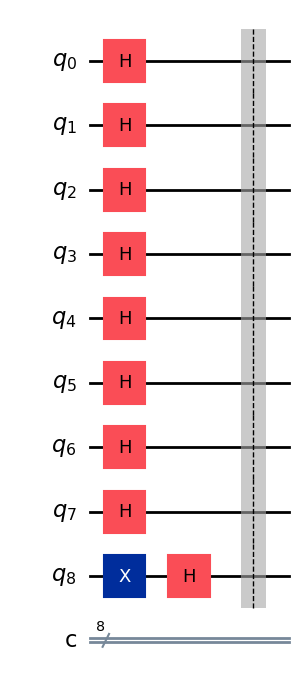

In [29]:
circuit.draw('mpl')

In [30]:
for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))



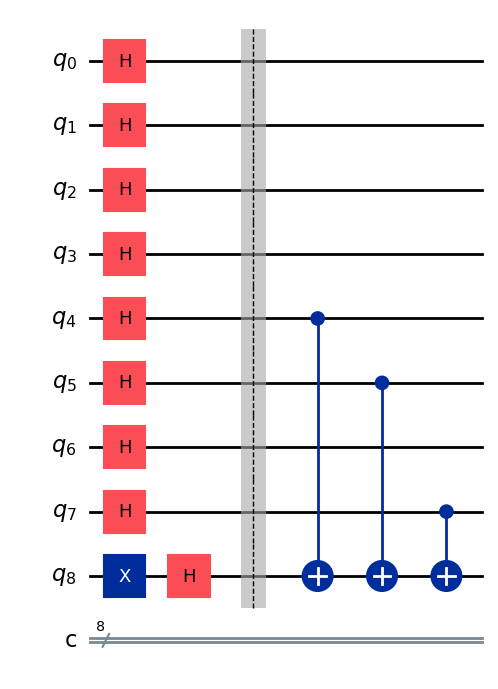

In [31]:
circuit.draw('mpl')

In [32]:
circuit.barrier()
circuit.h(range(len(secretnumber)))

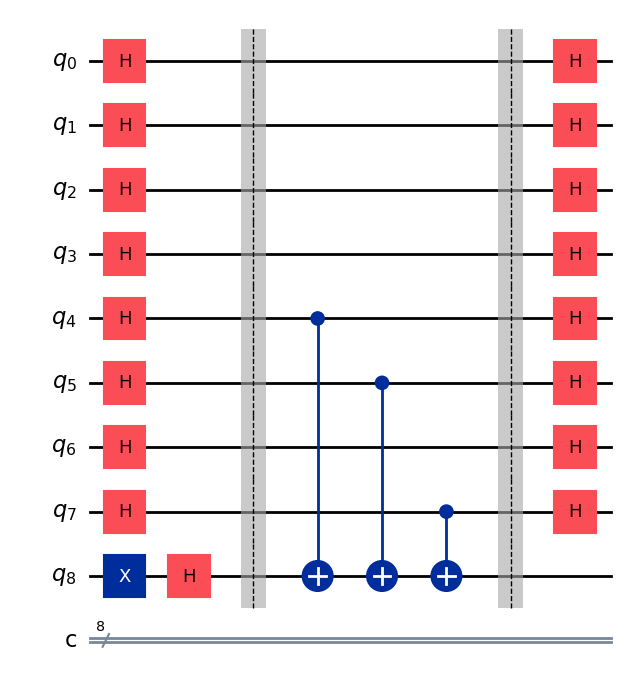

In [33]:
circuit.draw('mpl')

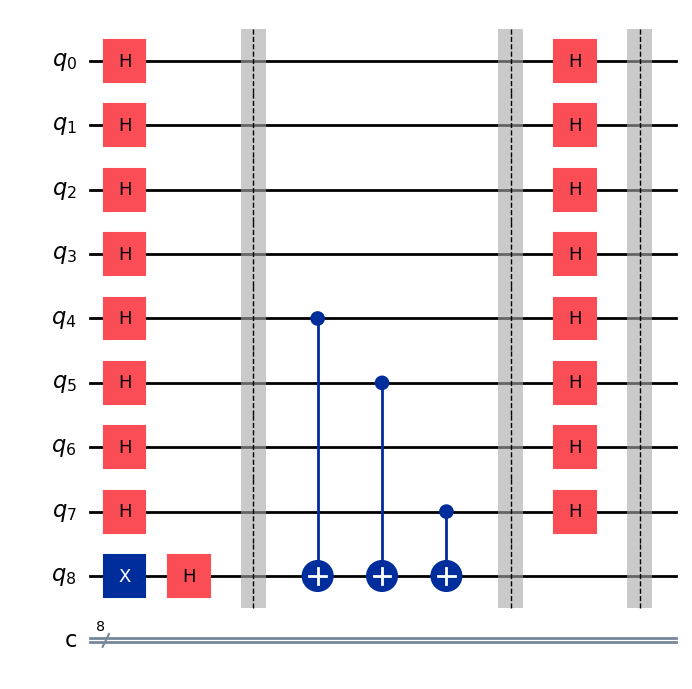

In [34]:
circuit.barrier()
circuit.draw('mpl')

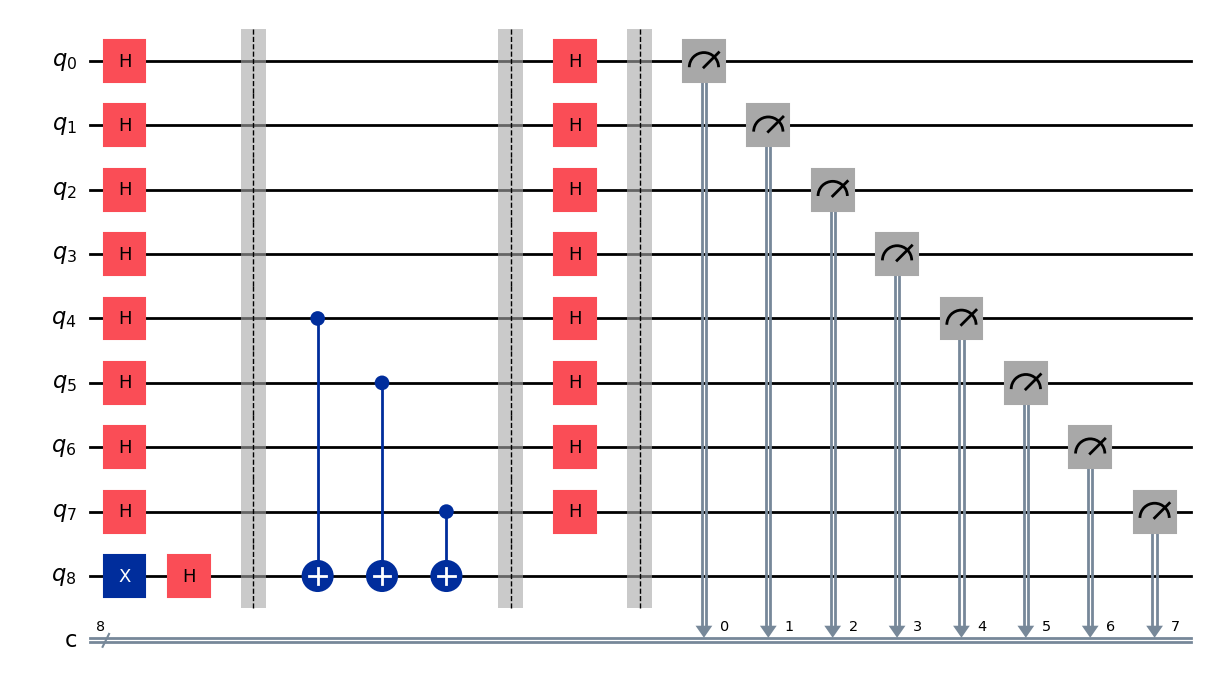

In [35]:
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))
circuit.draw('mpl')

In [36]:
simulator = Aer.get_backend('qasm_simulator')

In [37]:
result = transpile(circuit, backend = simulator)
job = simulator.run(result)
results = job.result()
counts = results.get_counts()
counts

{'10110000': 1024}

In [ ]:
def berstein_vazirani(secretnumber):
    circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))
    circuit.h(range(len(secretnumber)))
    circuit.x(len(secretnumber))
    circuit.h(len(secretnumber))
    circuit.draw('mpl')
    simulator = Aer.get_backend('qasm_simulator')

In [39]:
print(counts)

{'10110000': 1024}
